## DDW - Social Network Analysis

### Networkx

In [ ]:
! pip install networkx

### Basic Operations

#### Graphs

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
# new Graph
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_edges_from([(1,2),(1,3)])

# accessing nodes/edges
print(G.nodes())
print(G.edges())
print(G.neighbors(1))
print(G[1])
print(G[1][2])

[1, 2, 3]
[(1, 2), (1, 3)]
{2: {}, 3: {}}
{}


#### Graph attributes

In [2]:
# attributes
G.nodes[1]['room'] = 714
print(G.nodes(data=True))
G[1][2]['weight'] = 4.7
print(G.edges(data=True))

[(1, {'room': 714}), (2, {}), (3, {})]
[(1, 2, {'weight': 4.7}), (1, 3, {})]


#### Directed graphs

In [3]:
# directed graphs
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
print(DG.out_degree(1))
print(DG.degree(1))

1
2


#### Drawing

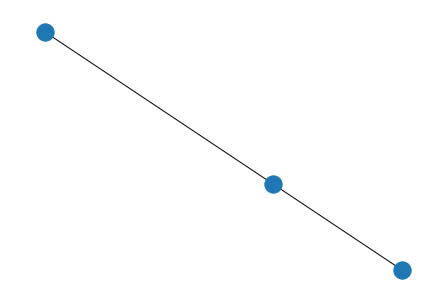

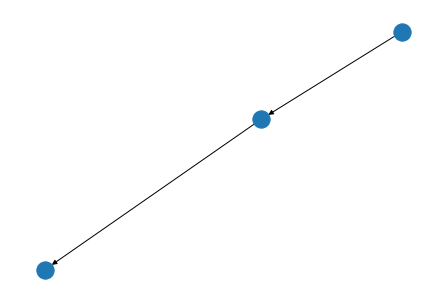

In [4]:
# drawing
#plt.clf()
nx.draw(G)
plt.show()
#plt.savefig("G.png")

#drawing
#plt.clf()
nx.draw(DG)
plt.show()
#plt.savefig("DG.png")

#### Visualization layout

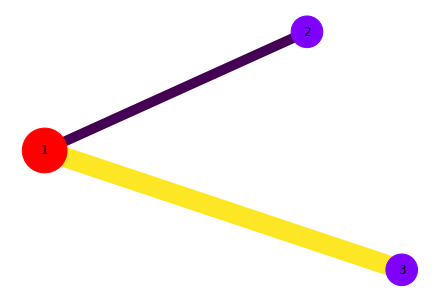

In [5]:
# %matplotlib notebook|inline
from networkx.drawing.nx_agraph import graphviz_layout
plt.clf()
pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[G.degree(v) for v in G],
        node_size=[1000*G.degree(v) for v in G],
        width = [(i+1)*10 for i,e in enumerate(G.edges())],
        edge_color = [(i+1)*10 for i,e in enumerate(G.edges())]
       )
# plt.savefig("layout.png")
plt.show()

#### Graph operations
```
subgraph(G, nbunch)      - induce subgraph of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G)   - return a directed representation of G
````

### Social Network Analysis methods

#### Components

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}
{32, 33, 34, 36, 37, 30}
{35}
{38, 39}
{31}
{40}
{41, 44}
{42, 43}
{48, 49, 45, 47}
{46}
{50}


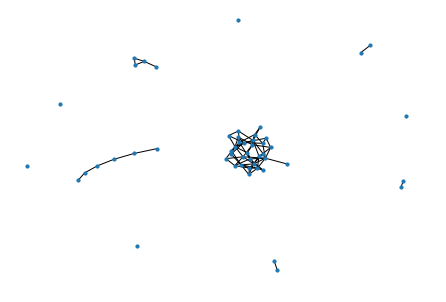

In [7]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
plt.clf()
G = nx.random_partition_graph([30,10,5,5,1], 0.15, 0.001, seed=5)
# pos = graphviz_layout(G)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10)
# plt.savefig("components.png")
#plt.show()

for component in nx.connected_components(G):
    print(component)

#### Centralities

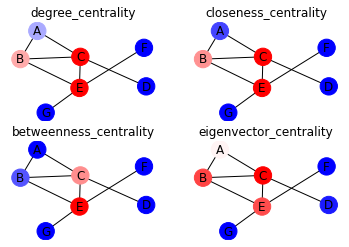

In [11]:
data= {"B":["A","E"], "C":["A", "B", "D", "E"], "E":["F","G"]}
G=nx.from_dict_of_lists(data)
pos = graphviz_layout(G, prog="fdp")
centralities = [nx.degree_centrality, nx.closeness_centrality,
 nx.betweenness_centrality, nx.eigenvector_centrality]
region=220
for centrality in centralities:
    region+=1
    plt.subplot(region)
    plt.title(centrality.__name__)
    nx.draw(G, pos, labels={v:str(v) for v in G},
      cmap = plt.get_cmap("bwr"), node_color=[centrality(G)[k] for k in centrality(G)])
# plt.savefig("centralities.png")
# plt.show()

#### Communities

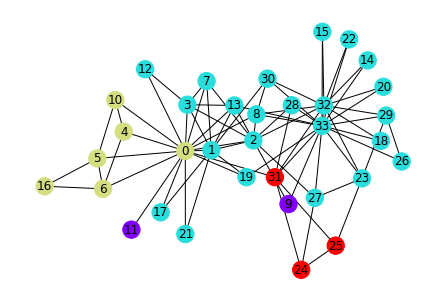

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
G=nx.karate_club_graph()
communities = {node:cid+1 for cid,community in enumerate(nx.algorithms.community.k_clique_communities(G,3)) for node in community}

pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
        labels={v:str(v) for v in G},
        cmap = plt.get_cmap("rainbow"),
        node_color=[communities[v] if v in communities else 0 for v in G])
# plt.savefig("communities.png")
# plt.show()

In [36]:
! pip install pandas

nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package words to /home/wrzecond/linux-
[nltk_data]     home/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /home/wrzecond/linux-
[nltk_data]     home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/wrzecond/linux-home/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/wrzecond/linux-home/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

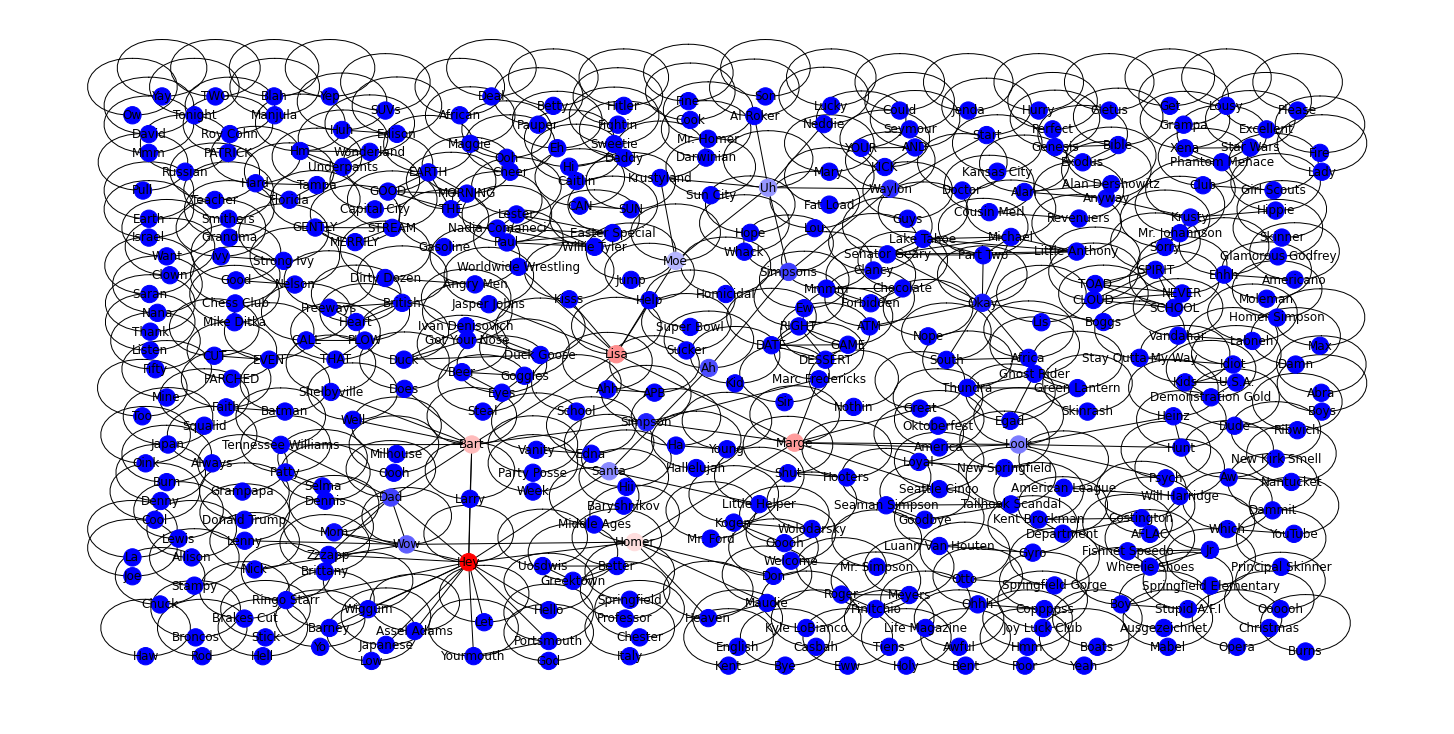

In [41]:
import nltk
import networkx
import pandas as pd

# input text
data = pd.read_csv("simpsons_dataset.csv")
lines = data["spoken_words"].astype(str).sample(1000) # vybereme 1000 řádků, přetypujeme a spojíme

def extractEntities(ne_chunked):
    data = {}
    for entity in ne_chunked: # projdeme strukturu
        if isinstance(entity, nltk.tree.Tree):
            text = " ".join([word for word, tag in entity.leaves()])
            ent = entity.label()
            data[text] = ent
        else:
            continue
    return data

G = nx.Graph()

for line in lines:
    tokens = nltk.word_tokenize(line)
    tagged = nltk.pos_tag(tokens)
    ne_chunked = nltk.ne_chunk(tagged, binary=False)

    ens = extractEntities(ne_chunked)

    for k1 in ens.keys():
        for k2 in ens.keys():
            G.add_edge(k1, k2)

# visualise
plt.figure(figsize=(20,10))
pos = graphviz_layout(G, prog="fdp")
nx.draw(G, pos,
         labels={v:str(v) for v in G},
         cmap = plt.get_cmap("bwr"),
         node_color=[nx.betweenness_centrality(G)[k] for k in nx.betweenness_centrality(G)],
         font_size=12
        )
# plt.show()

# write to GEXF
nx.write_gexf(G, "export.gexf")